# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("default")

## 1. Importa los datos 'df_furniture.csv'

In [2]:
df = pd.read_csv("data/df_furniture.csv")
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [4]:
df.describe()

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501852


In [5]:
# valores nulos

In [6]:
df[df["Month"].isnull()] #Mascara!

,Month,furniture_price_adjusted
15,NaN,2457.704334
21,NaN,2715.938414
39,NaN,2857.008678
40,NaN,3086.648631
60,NaN,3298.628987


In [7]:
# tamaño de la muestra

In [8]:
len(df)

331

In [9]:
# fecha mínima de la muestra

In [10]:
df["Month"]= pd.to_datetime(df["Month"])
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [11]:
df["Month"].min()

Timestamp('1992-01-01 00:00:00')

In [12]:
# fecha máxima de la muestra

In [13]:
df["Month"].max()

Timestamp('2019-07-01 00:00:00')

In [14]:
# dado que la frecuencia es mensual, rellena los valores nulos

# puedes usar un date_range

df = df.dropna()
df

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


In [15]:
# revisa si quedan nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  326 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


## 2. Trata la fecha como texto y parsea. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas

In [16]:
# Superconsejito: Haz un copy del df original para no pisarlo

# Esta parte del ejercicio es para repasar cómo parsear en caso de que recibas una fecha que no sea datetime, aunque no sea el caso

In [17]:
df_copy = df.copy()

df_copy["Month"] = df_copy["Month"].astype(str)

df_copy["Year"] = df_copy["Month"].str[:4]
df_copy["Month_Num"] = df_copy["Month"].str[5:7]
df_copy["Day"] = df_copy["Month"].str[8:10]

df_copy['Date_str'] = df_copy['Year'] + '-' + df_copy['Month_Num'] + '-' + df_copy['Day']

df_copy['Date'] = pd.to_datetime(df_copy['Date_str'])

df_copy.drop(columns=['Date_str'], inplace=True)

print(df_copy)

          Month  furniture_price_adjusted  Year Month_Num Day       Date
0    1992-01-01               2073.432724  1992        01  01 1992-01-01
1    1992-02-01               2114.485812  1992        02  01 1992-02-01
2    1992-03-01               2260.570891  1992        03  01 1992-03-01
3    1992-04-01               2255.103236  1992        04  01 1992-04-01
4    1992-05-01               2331.414618  1992        05  01 1992-05-01
..          ...                       ...   ...       ...  ..        ...
326  2019-03-01               9718.107698  2019        03  01 2019-03-01
327  2019-04-01               9248.814254  2019        04  01 2019-04-01
328  2019-05-01              10001.305304  2019        05  01 2019-05-01
329  2019-06-01               9431.337229  2019        06  01 2019-06-01
330  2019-07-01               9887.800688  2019        07  01 2019-07-01

[326 rows x 6 columns]


In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 0 to 330
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    object        
 1   furniture_price_adjusted  326 non-null    float64       
 2   Year                      326 non-null    object        
 3   Month_Num                 326 non-null    object        
 4   Day                       326 non-null    object        
 5   Date                      326 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 17.8+ KB


## 3. ¿De qué fecha a qué fecha va el histórico?

In [19]:
df

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


In [20]:
# min de la serie
# max de la serie

In [21]:
print(df["Month"].min())
print(df["Month"].max())

1992-01-01 00:00:00
2019-07-01 00:00:00


La serie va desde enero de 1992 a julio de 2019

In [22]:
# cálcula el tamaño de la serie en años

In [23]:
(df['Month'].dt.year.max()) - (df['Month'].dt.year.min())

27

## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

In [24]:
df

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


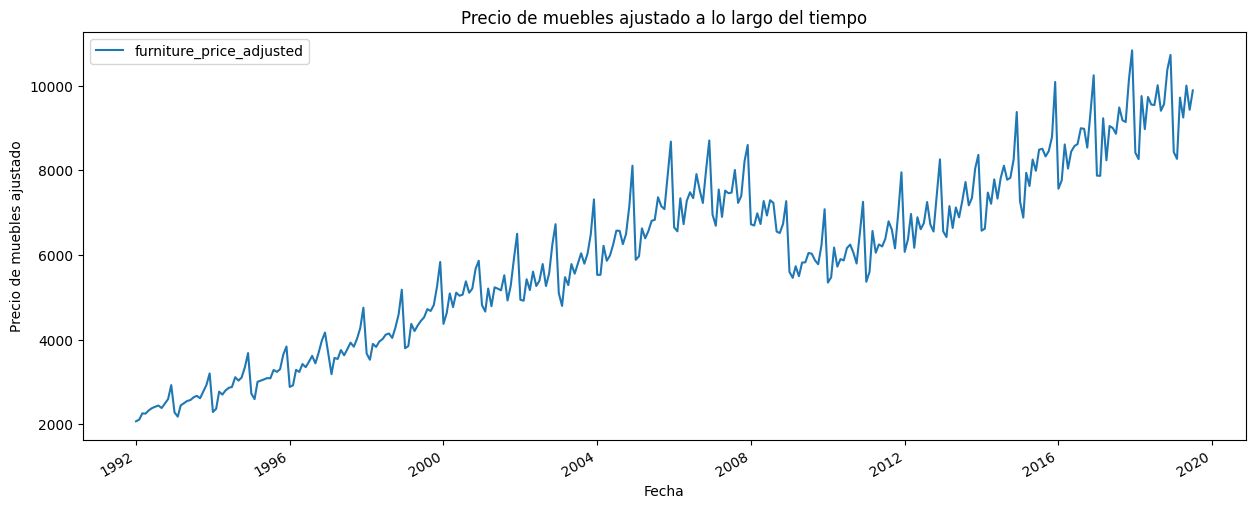

In [25]:
df.set_index('Month', inplace=True)

df.plot(figsize=(15, 6))
plt.xlabel('Fecha')
plt.ylabel('Precio de muebles ajustado')
plt.title('Precio de muebles ajustado a lo largo del tiempo')
plt.show()

Se ve que tiene una tendencia al alza, a pesar de descenso en las acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [26]:
df

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
# adfuller

adf = adfuller(df)
adf

(-1.0947325476367515,
 0.7171679263890323,
 15,
 310,
 {'1%': -3.451621854687657,
  '5%': -2.870908950689806,
  '10%': -2.571761810613944},
 4265.177438566132)

In [29]:
# describe toda la serie
df["furniture_price_adjusted"].describe()

count      326.000000
mean      6023.197995
std       2072.868105
min       2073.432724
25%       4392.210173
50%       6168.381980
75%       7416.934041
max      10833.501852
Name: furniture_price_adjusted, dtype: float64

In [30]:
# describe la primera mitad de la serie
df.iloc[:len(df)//2]["furniture_price_adjusted"].describe()

count     163.000000
mean     4476.963965
std      1474.730814
min      2073.432724
25%      3240.131402
50%      4374.180301
75%      5532.664613
max      8679.110403
Name: furniture_price_adjusted, dtype: float64

In [31]:
# describe la segunda mitad de la serie
df.iloc[len(df)//2:]["furniture_price_adjusted"].describe()

count      163.000000
mean      7569.432026
std       1278.303892
min       5349.481724
25%       6604.072700
50%       7343.639352
75%       8437.041802
max      10833.501852
Name: furniture_price_adjusted, dtype: float64

## 6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?


In [32]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [33]:
smoothed = lowess(df['furniture_price_adjusted'], df.index, frac=0.1)
smoothed

array([[6.94224000e+17, 2.20905074e+03],
       [6.96902400e+17, 2.23317226e+03],
       [6.99408000e+17, 2.25553865e+03],
       [7.02086400e+17, 2.27926330e+03],
       [7.04678400e+17, 2.30207517e+03],
       [7.07356800e+17, 2.32553580e+03],
       [7.09948800e+17, 2.34817050e+03],
       [7.12627200e+17, 2.37152366e+03],
       [7.15305600e+17, 2.39486725e+03],
       [7.17897600e+17, 2.41746457e+03],
       [7.20576000e+17, 2.44083115e+03],
       [7.23168000e+17, 2.46345074e+03],
       [7.25846400e+17, 2.48677527e+03],
       [7.28524800e+17, 2.50989706e+03],
       [7.30944000e+17, 2.53040832e+03],
       [7.36214400e+17, 2.57204304e+03],
       [7.38892800e+17, 2.59087156e+03],
       [7.41484800e+17, 2.60963607e+03],
       [7.44163200e+17, 2.63073458e+03],
       [7.46841600e+17, 2.65357527e+03],
       [7.52112000e+17, 2.70315585e+03],
       [7.54704000e+17, 2.73150821e+03],
       [7.57382400e+17, 2.75722877e+03],
       [7.60060800e+17, 2.78311401e+03],
       [7.624800

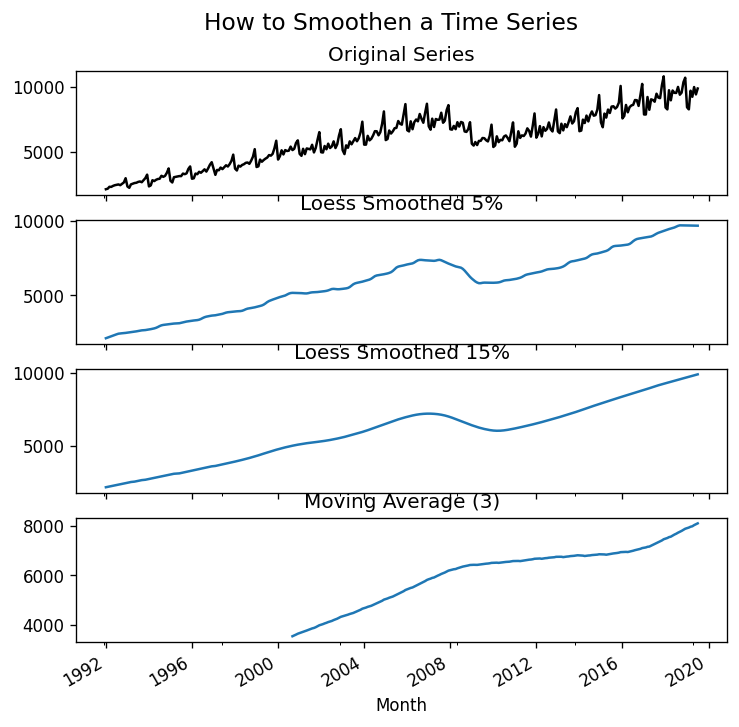

In [34]:
df_ma = df.furniture_price_adjusted.rolling(100).mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df.furniture_price_adjusted, np.arange(len(df.furniture_price_adjusted)), frac=0.05)[:, 1], index=df.index, columns=['furniture_price_adjusted'])
df_loess_15 = pd.DataFrame(lowess(df.furniture_price_adjusted, np.arange(len(df.furniture_price_adjusted)), frac=0.15)[:, 1], index=df.index, columns=['furniture_price_adjusted'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df['furniture_price_adjusted'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['furniture_price_adjusted'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['furniture_price_adjusted'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# model = "additive"
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

result_add = seasonal_decompose(df['furniture_price_adjusted'], model='additive', extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (10,8)})
result_add.plot()
plt.show()

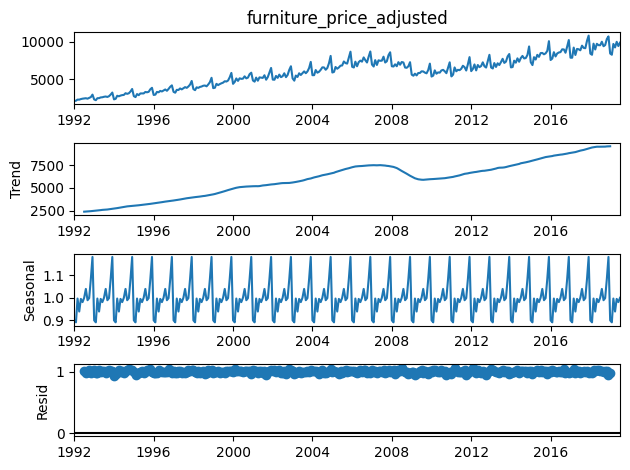

In [49]:
# model = "multiplicative"
result_mul = seasonal_decompose(df['furniture_price_adjusted'], model = 'multiplicative', extrapolate_trend = 'freq')

plt.rcParams.update({'figure.figsize': (6,6)})
result_mul.plot();

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

In [37]:
from pandas.plotting import autocorrelation_plot

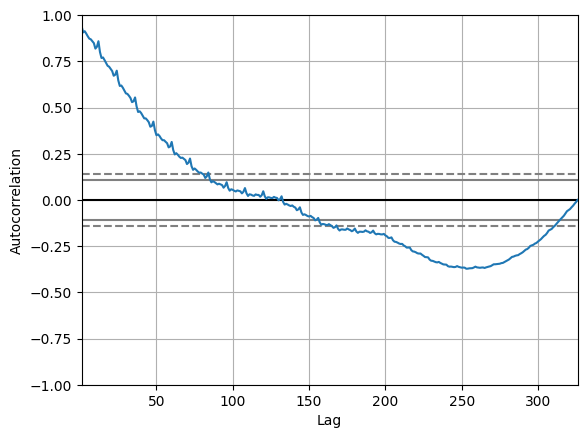

In [38]:
autocorrelation_plot(df.furniture_price_adjusted.values);

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

In [41]:
df_2 = df.copy()

for i in range(1, 6):
    df_2[f'lag{i}'] = df_2['furniture_price_adjusted'].shift(i)

df_2.head(20)

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
Month,,,,,,
1992-01-01,2073.432724,NaN,NaN,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN,NaN,NaN
1992-03-01,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN
1992-04-01,2255.103236,2260.570891,2114.485812,2073.432724,NaN,NaN
1992-05-01,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724,NaN
1992-06-01,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724
1992-07-01,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812
1992-08-01,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891
1992-09-01,2387.351705,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236


In [ ]:
# Superconsejito: Haz un copy del df original para no pisarlo

In [54]:
# df_2.head(20)

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1992-01-01,2073.432724,NaN,NaN,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN,NaN,NaN
1992-03-01,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN
1992-04-01,2255.103236,2260.570891,2114.485812,2073.432724,NaN,NaN
1992-05-01,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724,NaN
1992-06-01,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724
1992-07-01,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891,2114.485812
1992-08-01,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236,2260.570891
1992-09-01,2387.351705,2445.498729,2417.165376,2384.638567,2331.414618,2255.103236


In [43]:
# Matriz de correlación
correlation_matrix = df_2.corr()
correlation_matrix

,furniture_price_adjusted,lag1,lag2,lag3,lag4,lag5
furniture_price_adjusted,1.000000,0.949206,0.925873,0.943190,0.938781,0.933566
lag1,0.949206,1.000000,0.948781,0.925036,0.942776,0.938122
lag2,0.925873,0.948781,1.000000,0.948387,0.924422,0.942272
lag3,0.943190,0.925036,0.948387,1.000000,0.948074,0.923593
lag4,0.938781,0.942776,0.924422,0.948074,1.000000,0.947683
lag5,0.933566,0.938122,0.942272,0.923593,0.947683,1.000000


In [44]:
import seaborn as sns

<Axes: >

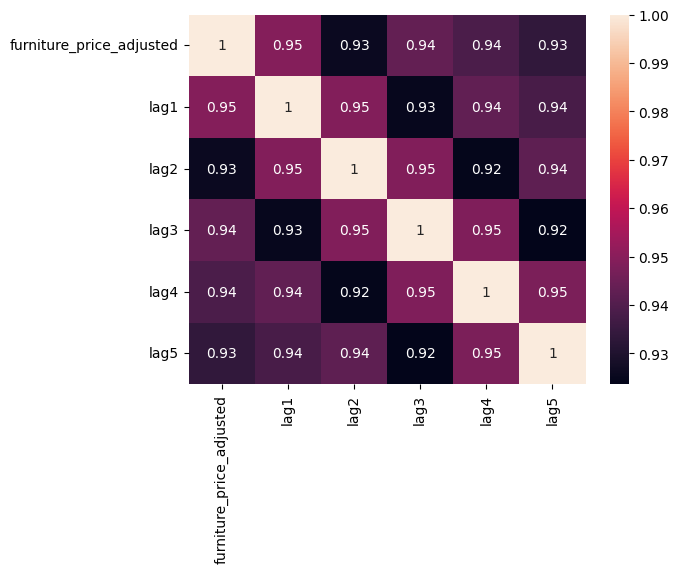

In [45]:
sns.heatmap(correlation_matrix, annot=True)

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [46]:
from statsmodels.graphics.tsaplots import plot_acf

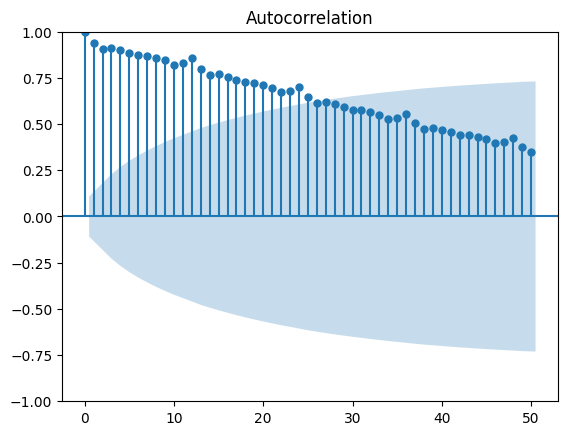

In [48]:
plot_acf(df_2['furniture_price_adjusted'], lags=50)

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [50]:
df

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


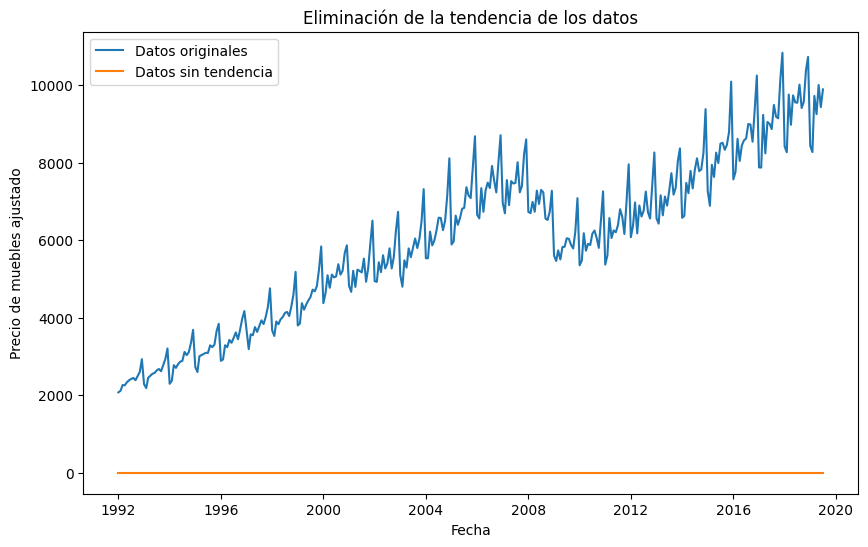

In [53]:
result = seasonal_decompose(df['furniture_price_adjusted'], model='additive', period=1 )

detrended_data = df['furniture_price_adjusted'] - result.trend

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['furniture_price_adjusted'], label='Datos originales')
plt.plot(df.index, detrended_data, label='Datos sin tendencia')
plt.xlabel('Fecha')
plt.ylabel('Precio de muebles ajustado')
plt.title('Eliminación de la tendencia de los datos')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Date'>

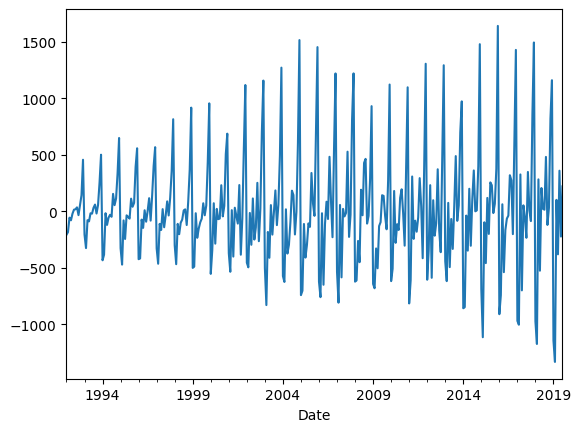

<Axes: xlabel='Month'>

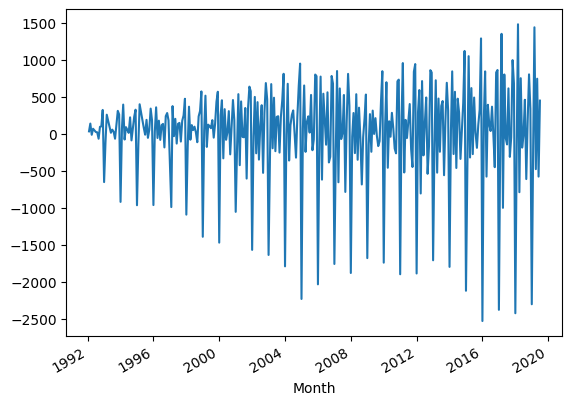

In [51]:
diff = df['furniture_price_adjusted'].diff(1).dropna()
diff.plot()